In [2]:
%matplotlib inline 

import pandas as pd
import numpy as np
import seaborn as sns
from ipywidgets import interact, interact_manual
import matplotlib.pyplot as plt
import matplotlib
import os
import json
from functools import reduce
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error

In [3]:
SMALL_SIZE = 12
MEDIUM_SIZE = 14
BIGGER_SIZE = 24

plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

# Results

In [4]:
RESULTS = './results/'
def read_results():
        results = dict()
        experiments  = os.listdir(RESULTS)
        experiments = [experiment for experiment in experiments if  'ipynb_checkpoints' not in experiment ]
        for experiment in experiments:
            experiment_result_path = os.path.join(RESULTS , experiment)
            print(experiment_result_path)
            experiment = experiment.split('.csv')[0]
            results.update({
                experiment: pd.read_csv(experiment_result_path)
            })  
        return results  

# Load Configuration

In [5]:
CONFIGURATIONS = './configurations/'
EXPERIMENT_VERSION = 'exp_v1'
config_file_name = EXPERIMENT_VERSION + '.json'

config_file_name_path = os.path.join(CONFIGURATIONS + config_file_name)

with open(config_file_name_path, 'r') as f:
    configuration = json.load(f)

## Joining Different Results Together

In [6]:
results = read_results()
merged_fold_results = dict()
for fold in range(0, 4):
    fold_experiments = [experiment for experiment in  list(results.keys()) if '_'+ str(fold) in experiment]
    dfs_fold = [results[experiment] for experiment in fold_experiments]
    df_fold_merged = reduce(lambda left,right: pd.merge(left,right, how = 'left'), dfs_fold)
    merged_fold_results.update({fold:df_fold_merged })

./results/exp_v2_Elastic_3.csv
./results/exp_v2_Elastic_2.csv
./results/exp_v2_Elastic_0.csv
./results/exp_v2_Elastic_1.csv
./results/exp_v1_Elastic_0.csv
./results/exp_v1_Elastic_1.csv
./results/exp_v1_Elastic_3.csv
./results/exp_v1_Elastic_2.csv
./results/exp_v2_Random_2.csv
./results/exp_v1_Linear_3.csv
./results/exp_v1_Linear_2.csv
./results/exp_v2_Random_3.csv
./results/exp_v2_Random_1.csv
./results/exp_v1_Linear_0.csv
./results/exp_v1_Linear_1.csv
./results/exp_v2_Random_0.csv
./results/exp_v2_Lasso_1.csv
./results/exp_v2_Lasso_0.csv
./results/exp_v2_Lasso_2.csv
./results/exp_v2_Lasso_3.csv
./results/exp_v2_Linear_2.csv
./results/exp_v1_Random_3.csv
./results/exp_v1_Random_2.csv
./results/exp_v2_Linear_3.csv
./results/exp_v2_Linear_1.csv
./results/exp_v1_Random_0.csv
./results/exp_v1_Random_1.csv
./results/exp_v2_Linear_0.csv
./results/exp_v1_Lasso_3.csv
./results/exp_v1_Lasso_2.csv
./results/exp_v1_Lasso_0.csv
./results/exp_v1_Lasso_1.csv


In [1]:
def get_metrics(results):
    target = configuration['metadata']['target']
    actual_values  = results[target].values
    metrics = []
    models = [col for col in list(results.columns) if 'exp' in col]
    for model in models:
        pred_values = results[model].values
        
        absolute_error = mean_absolute_error(
            actual_values,
            pred_values
        )

        mean_sqaured_error = mean_squared_error(
            actual_values,
            pred_values
        )
        
        metrics.append([model, absolute_error, mean_sqaured_error])
    metrics = pd.DataFrame(metrics)
    metrics.columns = ['model', 'absolute_error', 'mean_sqaured_error']
    
    return metrics
    

## Plot Metrics



#############################
Fold - 0
#############################
              model  absolute_error  mean_sqaured_error
0  exp_v2_Elastic_0        0.073166            0.033094
1  exp_v1_Elastic_0        0.073166            0.033094
2   exp_v1_Linear_0        0.073167            0.033109
3   exp_v2_Random_0        0.090396            0.037335
4    exp_v2_Lasso_0        0.073166            0.033094
5   exp_v1_Random_0        0.090505            0.037655
6   exp_v2_Linear_0        0.073162            0.033108
7    exp_v1_Lasso_0        0.073166            0.033094


#############################
Fold - 1
#############################
              model  absolute_error  mean_sqaured_error
0  exp_v2_Elastic_1        0.070089            0.030953
1  exp_v1_Elastic_1        0.070089            0.030953
2   exp_v2_Random_1        0.087053            0.035735
3   exp_v1_Linear_1        0.070117            0.030944
4    exp_v2_Lasso_1        0.070089            0.030953
5   exp_v2_Linear_

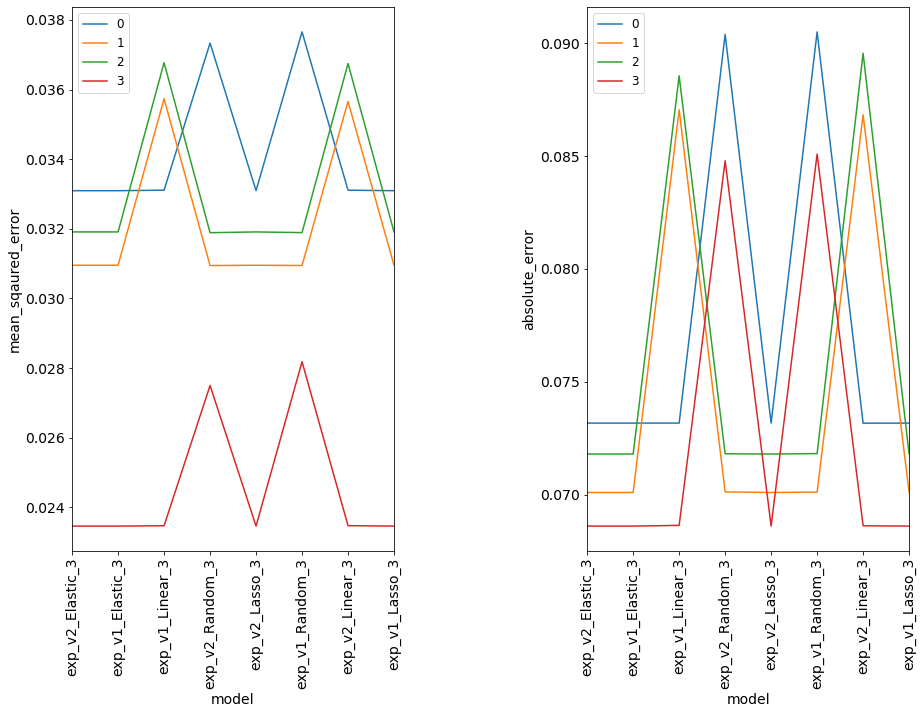

In [8]:
fig, ax = plt.subplots(1,2, figsize=(15, 10))
plt.subplots_adjust(wspace=0.6)
plt.xticks(rotation=90)
for fold in range(0, 4):
    metrics = get_metrics(merged_fold_results[fold])
    print("\n")
    print("#############################")
    print("Fold - {}".format(fold))
    print("#############################")
    pd.DataFrame(metrics).set_index('model').mean_sqaured_error.plot(label = fold, ax = ax[0])
    pd.DataFrame(metrics).set_index('model').absolute_error.plot(label = fold, ax = ax[1])
    
    ax[0].set_ylabel('mean_sqaured_error')
    ax[1].set_ylabel('absolute_error')
    ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)
    ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation = 90)
    
    ax[0].legend()
    ax[1].legend()

    
    print(metrics) 


# Model Error Analysis

In [9]:

import cufflinks as cf
target = configuration['metadata']['target']
@interact
def visualize_categorical_features(
    Type = ['DensityDistribution',  'CountDistribution', 'Comparison'],
    Fold = [0,1,2,3,4],
    version = ['exp_v1']
):
        
    models = [col for col in  merged_fold_results[Fold].columns if version in col]
    fig, ax = plt.subplots(1,4, figsize=(15, 10))
    for i in range(0, 4):
            model = models[i]
            merged_fold_results[Fold][target].plot(ax = ax[i],label = target, color = 'green')
            merged_fold_results[Fold][model].plot(ax = ax[i], label = model, color = 'red')
            ax[i].legend()
    

interactive(children=(Dropdown(description='Type', options=('DensityDistribution', 'CountDistribution', 'Compa…